<a href="https://colab.research.google.com/github/tarasov001/ml/blob/main/Employee_promotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%autosave 10

Autosaving every 10 seconds


# 0. Описание задачи

У крупных организаций существует проблема - определения людей для продвижения и своевременная подготовка к новым должностям.

Окончательные предложения делаются сотрдникам только после долгой оценки его работы, что приводит к задержке перехода к новым должностям. Следовательно, компании нужна помощь в определении подходящих кандидатов на повышение, чтобы они могли ускорить весь цикл продвижения.

# 1. Загрузка данных

In [120]:
df = pd.read_csv("data.csv")
data = df.copy()

data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [121]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

employee_id: Уникальный ID номер сотрудника\
department: Отдел\
region: Регион\
education: Образование\
gender: Пол\
recruitment_channel: Канал найма\
no_ of_ trainings: Количество пройденных сотрудником тренингов в прошлом году\
age: Возраст\
previous_ year_ rating: Рейтинг сотрудника в прошлом году\
legth_of_service: Стаж работы в годах\
awards_ won: Есть ли награды в прошлом году (1 - да, 0 - нет)\
avg_ training_ score: Средний балл по обучающим курсам\
is_promoted: Рекомендован к повышению или нет

In [122]:
data = data.rename(columns={'awards_won?' : 'awards_won'})

Удалим ненужный стобец данных с id номером каждого сотрудника

In [123]:
data = data.drop(labels='employee_id', axis=1)
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


# 2. Визуализация и описательная статистика

Сводная информация о признаках:

In [32]:
data.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


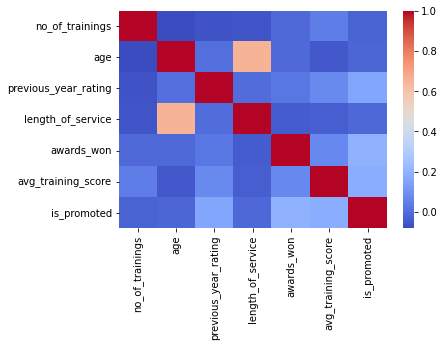

In [33]:
sns.heatmap(data.corr(), cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


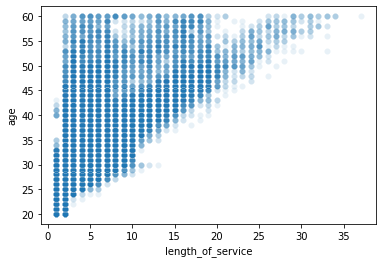

In [34]:
sns.scatterplot(data.length_of_service, data.age, alpha=0.1)

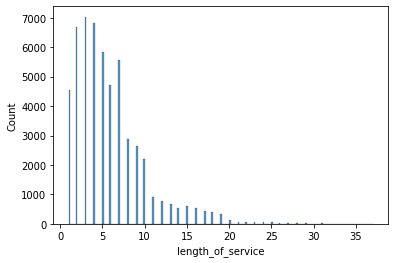

In [35]:
sns.histplot(data.length_of_service)

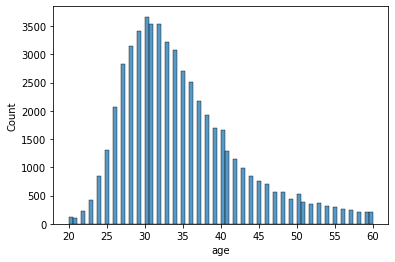

In [36]:
sns.histplot(data.age)

Распределения возраста и стажа имеют сильную ассиметрию, что говорит об отличии распределения от нормального, значит коэффициент корреляции Пирсона не дает нам действительных сведений о линейной зависимости данных.

# 3. Поиск и обработка пропущенных значений

Посмотрим сколько пропцщенных значений в каждом столбце

In [37]:
data.isna().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

In [38]:
data.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [39]:
data.previous_year_rating.unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

В столбце education пропущенные значения означают отсутствие образования совсем, поэтому заменим их на строковое обознакчение\
Также понятно, что работники, у которых в столбце previous_year_rating пустое значение, работают первый год, поэтому заменим пропущенные значения на 0

Заполним пустые значения в столбцах:

In [40]:
data.education = data.education.fillna('Without education')

In [41]:
data.education.unique()

array(["Master's & above", "Bachelor's", 'Without education',
       'Below Secondary'], dtype=object)

In [42]:
data.previous_year_rating = data.previous_year_rating.fillna(0.0)

In [43]:
data.previous_year_rating.unique()

array([5., 3., 1., 4., 0., 2.])

# 4. Обработка категориальных признаков

Найдем все категориальные признаки:

In [44]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [45]:
data.department.unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [46]:
data[object_cols]

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing
54804,Operations,region_27,Master's & above,f,other
54805,Analytics,region_1,Bachelor's,m,other
54806,Sales & Marketing,region_9,Without education,m,sourcing


Признаки 'department','recruitment_channel', 'region' являются номинальными, а 'education', 'gender' целесорбразно отнести к порядковым. Если преобразовать признак 'region' как номинальный, то это приведет к сильному увеличению размерности данных, что негативно скажется на времени обучения нашей модели, поэтому я отнесу его в список порядковых признаков.


In [47]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [48]:
ordinal_encoder = OrdinalEncoder()


ordinal_cols = ['education',  'region', 'gender']
one_hot_cols = ['department','recruitment_channel']

In [49]:
data[ordinal_cols] = ordinal_encoder.fit_transform(data[ordinal_cols])
one_hot_data = pd.get_dummies(data[one_hot_cols])
data = data.drop(one_hot_cols, axis=1)
data = pd.concat([data, one_hot_data], axis=1)

In [50]:
ordinal_encoder.categories_

[array(["Bachelor's", 'Below Secondary', "Master's & above",
        'Without education'], dtype=object),
 array(['region_1', 'region_10', 'region_11', 'region_12', 'region_13',
        'region_14', 'region_15', 'region_16', 'region_17', 'region_18',
        'region_19', 'region_2', 'region_20', 'region_21', 'region_22',
        'region_23', 'region_24', 'region_25', 'region_26', 'region_27',
        'region_28', 'region_29', 'region_3', 'region_30', 'region_31',
        'region_32', 'region_33', 'region_34', 'region_4', 'region_5',
        'region_6', 'region_7', 'region_8', 'region_9'], dtype=object),
 array(['f', 'm'], dtype=object)]

In [51]:
data.head()

,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,31.0,2.0,0.0,1,35,5.0,8,0,49,0,0,0,0,0,0,0,0,1,0,0,0,1
1,14.0,0.0,1.0,1,30,5.0,4,0,60,0,0,0,0,0,1,0,0,0,0,1,0,0
2,10.0,0.0,1.0,1,34,3.0,7,0,50,0,0,0,0,0,0,0,0,1,0,0,0,1
3,15.0,0.0,1.0,2,39,1.0,10,0,50,0,0,0,0,0,0,0,0,1,0,1,0,0
4,18.0,0.0,1.0,1,45,3.0,2,0,73,0,0,0,0,0,0,0,0,0,1,1,0,0


# 5. Нормализация данных

In [52]:
data.mean(axis=0), data.std(axis=0)

(region                          15.428970
 education                        0.691176
 gender                           0.702379
 no_of_trainings                  1.253011
 age                             34.803915
 previous_year_rating             3.078748
 length_of_service                5.865512
 awards_won                       0.023172
 avg_training_score              63.386750
 is_promoted                      0.085170
 department_Analytics             0.097650
 department_Finance               0.046271
 department_HR                    0.044118
 department_Legal                 0.018957
 department_Operations            0.207050
 department_Procurement           0.130236
 department_R&D                   0.018227
 department_Sales & Marketing     0.307254
 department_Technology            0.130236
 recruitment_channel_other        0.555503
 recruitment_channel_referred     0.020836
 recruitment_channel_sourcing     0.423661
 dtype: float64, region                           8.76

In [53]:
data_norm = (data - data.mean(axis=0)) / data.std(axis=0)
data_norm.describe()

,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
count,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04
mean,3.862242e-16,-1.768076e-16,-4.988347e-16,2.137098e-15,-3.489359e-16,-6.093992e-17,4.175880e-16,1.902468e-16,1.004605e-16,1.139711e-15,-9.691501e-16,-6.556176e-16,2.222747e-15,2.912772e-15,3.212654e-16,4.698637e-16,-3.129092e-15,-6.147104e-16,-4.682695e-15,-1.500290e-15,1.417559e-15,-6.165416e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.760303e+00,-6.837572e-01,-1.536209e+00,-4.152724e-01,-1.932583e+00,-2.057356e+00,-1.140775e+00,-1.540163e-01,-1.823778e+00,-3.051190e-01,-3.289611e-01,-2.202602e-01,-2.148325e-01,-1.390074e-01,-5.109882e-01,-3.869561e-01,-1.362546e-01,-6.659755e-01,-3.869561e-01,-1.117904e+00,-1.458745e-01,-8.573657e-01
25%,-5.053045e-01,-6.837572e-01,-1.536209e+00,-4.152724e-01,-7.576746e-01,-7.208671e-01,-6.718521e-01,-1.540163e-01,-9.263504e-01,-3.051190e-01,-3.289611e-01,-2.202602e-01,-2.148325e-01,-1.390074e-01,-5.109882e-01,-3.869561e-01,-1.362546e-01,-6.659755e-01,-3.869561e-01,-1.117904e+00,-1.458745e-01,-8.573657e-01
50%,-1.630323e-01,-6.837572e-01,6.509413e-01,-4.152724e-01,-2.354929e-01,-5.262266e-02,-2.029292e-01,-1.540163e-01,-2.532801e-01,-3.051190e-01,-3.289611e-01,-2.202602e-01,-2.148325e-01,-1.390074e-01,-5.109882e-01,-3.869561e-01,-1.362546e-01,-6.659755e-01,-3.869561e-01,8.945145e-01,-1.458745e-01,-8.573657e-01
75%,6.356029e-01,1.294774e+00,6.509413e-01,-4.152724e-01,5.477796e-01,6.156218e-01,2.659936e-01,-1.540163e-01,9.432894e-01,-3.051190e-01,-3.289611e-01,-2.202602e-01,-2.148325e-01,-1.390074e-01,-5.109882e-01,-3.869561e-01,-1.362546e-01,1.501529e+00,-3.869561e-01,8.945145e-01,-1.458745e-01,1.166342e+00
max,2.004692e+00,2.284040e+00,6.509413e-01,1.435665e+01,3.289233e+00,1.283866e+00,7.299836e+00,6.492699e+00,2.663358e+00,3.277350e+00,3.039817e+00,4.540001e+00,4.654704e+00,7.193732e+00,1.956957e+00,2.584225e+00,7.339065e+00,1.501529e+00,2.584225e+00,8.945145e-01,6.855081e+00,1.166342e+00


# 6. Отбор признаков

Х - таблица с признаками

In [54]:
X = data_norm.drop(['is_promoted'], axis=1)

y - то, что мы будем предсказывать, то есть повышение

In [55]:
y = data.is_promoted

Разобьем выборки на тренировочные и тестовые

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

# 7. Обучение c помощью KNeighborsClassifier

### 7.1. Обучение модели

Создадим несколько моделей с разным параметром К

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
model_k2 = KNeighborsClassifier(n_neighbors=2)
model_k2.fit(X_train, y_train)

y_k2_train_predict = model_k2.predict(X_train)
y_k2_test_predict = model_k2.predict(X_test)

In [60]:
model_k5 = KNeighborsClassifier(n_neighbors=5)
model_k5.fit(X_train, y_train)

y_k5_train_predict = model_k5.predict(X_train)
y_k5_test_predict = model_k5.predict(X_test)

In [61]:
model_k10 = KNeighborsClassifier(n_neighbors=10)
model_k10.fit(X_train, y_train)

y_k10_train_predict = model_k10.predict(X_train)
y_k10_test_predict = model_k10.predict(X_test)

In [62]:
model_k15 = KNeighborsClassifier(n_neighbors=15)
model_k15.fit(X_train, y_train)

y_k15_train_predict = model_k15.predict(X_train)
y_k15_test_predict = model_k15.predict(X_test)

In [63]:
model_k50 = KNeighborsClassifier(n_neighbors=50)
model_k50.fit(X_train, y_train)

y_k50_train_predict = model_k50.predict(X_train)
y_k50_test_predict = model_k50.predict(X_test)

### 7.2. Метрика качества

In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
MSE_train = mean_squared_error(y_train, y_k2_train_predict)
MSE_test = mean_squared_error(y_test, y_k2_test_predict)
MSE_train, MSE_test

(0.06307832659976541, 0.07954752782338989)

In [66]:
MSE_train = mean_squared_error(y_train, y_k5_train_predict)
MSE_test = mean_squared_error(y_test, y_k5_test_predict)
MSE_train, MSE_test

(0.06852600026065424, 0.0785136532262969)

In [67]:
MSE_train = mean_squared_error(y_train, y_k10_train_predict)
MSE_test = mean_squared_error(y_test, y_k10_test_predict)
MSE_train, MSE_test

(0.07517268343542291, 0.07887855014291796)

In [68]:
MSE_train = mean_squared_error(y_train, y_k15_train_predict)
MSE_test = mean_squared_error(y_test, y_k15_test_predict)
MSE_train, MSE_test

(0.07566792649550372, 0.07948671167061971)

In [69]:
MSE_train = mean_squared_error(y_train, y_k50_train_predict)
MSE_test = mean_squared_error(y_test, y_k50_test_predict)
MSE_train, MSE_test

(0.07861331943177376, 0.08185854162865656)

На нашей модели изменение параметра К не дает сильной разница в качетсве предсказания.\
Все модели показали неплохие результаты с ошибкой на тестовой выборке приблизительно 8%.
Разницы в тренировочных и тестовых ошиках небольшие, поэтому можно сделать вывод, что наша модель не переобучена.

# 8. Обучение с помощью RandomForestClassifier

### 8.1. Обучение модели

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf_model = RandomForestClassifier(random_state=88)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=88, verbose=0,
                       warm_start=False)

In [72]:
y_rf_train_predict = rf_model.predict(X_train)
y_rf_test_predict = rf_model.predict(X_test)

### 8.2. Метрика качетсва

In [73]:
MSE_train = mean_squared_error(y_train, y_rf_train_predict)
MSE_test = mean_squared_error(y_test, y_rf_test_predict)

MSE_train, MSE_test

(0.0004691776358660237, 0.062458188894970505)

Модель, обученная с помощью алгоритма Рандомный лес дала меньшие ошибки на тренировочной и тестовой выборках чем предыдущая модель (К ближайших соседей).

### 8.3. Важность признаков

In [74]:
importances = rf_model.feature_importances_

importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
importances

avg_training_score              0.325729
age                             0.153675
region                          0.131673
length_of_service               0.121129
previous_year_rating            0.055802
awards_won                      0.029886
no_of_trainings                 0.025356
education                       0.023180
gender                          0.023099
department_Sales & Marketing    0.019570
department_Operations           0.017044
recruitment_channel_other       0.012769
recruitment_channel_sourcing    0.012535
department_Procurement          0.010268
department_Analytics            0.008992
department_Technology           0.007775
department_Finance              0.006188
department_R&D                  0.005024
department_HR                   0.004278
recruitment_channel_referred    0.003814
department_Legal                0.002215
dtype: float64

In [75]:
importances.sum()

1.0

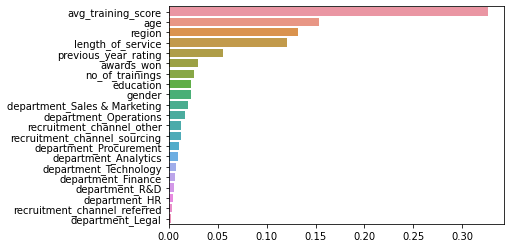

In [76]:
sns.barplot(y=importances.index, x=importances)
pass

Из данного графика видно, что некоторые признаки имеют более низкую значимость для нашей модели чем остальные.\
Значит можно попробовать снизить разменрность нашей модели с незначительными потерями в точности предсказания.

### 8.4. Снижение размерности

Попробуем взять для нашей модели только первые 11 признаков из предыдущего графика.

In [104]:
importance_features = importances.index.to_list()[:11]
importance_features

['avg_training_score',
 'age',
 'region',
 'length_of_service',
 'previous_year_rating',
 'awards_won',
 'no_of_trainings',
 'education',
 'gender',
 'department_Sales & Marketing',
 'department_Operations']

In [105]:
X_2 = X[importance_features].copy()
X_2

,avg_training_score,age,region,length_of_service,previous_year_rating,awards_won,no_of_trainings,education,gender,department_Sales & Marketing,department_Operations
0,-1.075922,0.025598,1.776510,0.500455,1.283866,-0.154016,-0.415272,1.294774,-1.536209,1.501529,-0.510988
1,-0.253280,-0.627129,-0.163032,-0.437391,1.283866,-0.154016,-0.415272,-0.683757,0.650941,-0.665975,1.956957
2,-1.001136,-0.104947,-0.619395,0.265994,-0.052623,-0.154016,-0.415272,-0.683757,0.650941,1.501529,-0.510988
3,-1.001136,0.547780,-0.048942,0.969378,-1.389112,-0.154016,1.226052,-0.683757,0.650941,1.501529,-0.510988
4,0.718933,1.331052,0.293331,-0.906313,-0.052623,-0.154016,-0.415272,-0.683757,0.650941,-0.665975,-0.510988
...,...,...,...,...,...,...,...,...,...,...,...
54803,1.092861,1.722688,-1.189849,2.610608,-0.052623,-0.154016,-0.415272,-0.683757,0.650941,-0.665975,-0.510988
54804,-0.552422,0.286689,0.407421,0.031532,-0.720867,-0.154016,-0.415272,1.294774,-1.536209,-0.665975,1.956957
54805,1.167646,-1.018765,-1.760303,-0.671852,1.283866,-0.154016,-0.415272,-0.683757,0.650941,-0.665975,-0.510988
54806,-1.375064,-0.757675,2.004692,-0.906313,-1.389112,-0.154016,-0.415272,2.284040,0.650941,1.501529,-0.510988


In [106]:
X_2_train, X_2_test, y_2_train, y_2_test= train_test_split(X_2, y)

In [107]:
rf_model_2 = RandomForestClassifier(random_state=88).fit(X_2_train, y_2_train)

In [108]:
y_2_test_predict = rf_model_2.predict(X_2_test)

MSE_test_2 = mean_squared_error(y_2_test, y_2_test_predict)
MSE_test_2

0.06604875200700627

In [109]:
MSE_test_2 - MSE_test

0.0035905631120357676

In [112]:
X.shape[1] - X_2.shape[1]

10

Мы смогли снизить размерность на 10 признаков, но при этом увеличилась ошибка предсказания приблизительно на 0.4%.

# 9. Вывод

В результате проведенной мною работы, я создал несколько моделей машинного обучения для отбора кандидатов на повышение в должности. Мною использовались два алгоритма: KNeighborsClassifier и RandomForestClassifier. Для обработки категориальных признаков я выбрал подходы One-Hot Encoding и Ordinal Encoding. Среди рассмотренных мною параметров К для обучения модели алгоритмом KNeighborsClassifier, наилучший результат на тестовой выборке - 7,85% был достигнут при K = 5. Но стоит отметить, что он не сильно отличается от остальных, лучше приблизительно на 0,1%. Модель, обученная алгоритмом RandomForestClassifier показала более хороший результат чем предыдущая - 6,24%, приблизительно на 1,6% до снижения размерности данных и 1,2% после. На основе полученных мною результатов, я могу сделать вывод, что при выявлении кандидатов на повышение в должности из рассмотренных алгоритмов машинного обучения более точные предсказания дает - RandomForestClassifier.